<a href="https://colab.research.google.com/github/mahfuz978/TECH-I.S.---Unsupervised-Learning/blob/main/Clustering/Mahfuzur_kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Tech-i-s/techis-ds-wiki/master/Step%204-2%20Unsupervised%20Learning/01_Clustering/auto-mpg.csv?token=AM2M2N6M327F5U5IZ3TOUWDANTNLI', na_values='?')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [4]:
df.shape

(398, 9)

In [5]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
for cols in df.columns:
  print(cols, 'has:', df[cols].nunique(), 'Unique Values')

mpg has: 129 Unique Values
cylinders has: 5 Unique Values
displacement has: 82 Unique Values
horsepower has: 93 Unique Values
weight has: 351 Unique Values
acceleration has: 95 Unique Values
model year has: 13 Unique Values
origin has: 3 Unique Values
car name has: 305 Unique Values


In [7]:
df.mpg.unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [8]:
df.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [9]:
x = df[df['horsepower']!=np.nan]
x = x.horsepower.median()
x

93.5

In [10]:
df.horsepower.replace(to_replace=np.nan, value=x, inplace = True)

In [11]:
df.horsepower.unique()

array([130. , 165. , 150. , 140. , 198. , 220. , 215. , 225. , 190. ,
       170. , 160. ,  95. ,  97. ,  85. ,  88. ,  46. ,  87. ,  90. ,
       113. , 200. , 210. , 193. ,  93.5, 100. , 105. , 175. , 153. ,
       180. , 110. ,  72. ,  86. ,  70. ,  76. ,  65. ,  69. ,  60. ,
        80. ,  54. , 208. , 155. , 112. ,  92. , 145. , 137. , 158. ,
       167. ,  94. , 107. , 230. ,  49. ,  75. ,  91. , 122. ,  67. ,
        83. ,  78. ,  52. ,  61. ,  93. , 148. , 129. ,  96. ,  71. ,
        98. , 115. ,  53. ,  81. ,  79. , 120. , 152. , 102. , 108. ,
        68. ,  58. , 149. ,  89. ,  63. ,  48. ,  66. , 139. , 103. ,
       125. , 133. , 138. , 135. , 142. ,  77. ,  62. , 132. ,  84. ,
        64. ,  74. , 116. ,  82. ])

In [12]:
df.horsepower = df.horsepower.astype('float64')

In [13]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [14]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


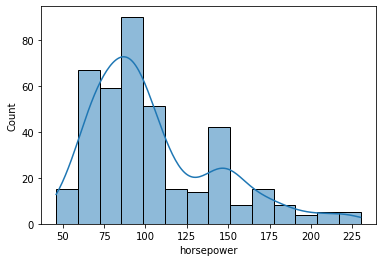

In [15]:
# distribution plot on horsepower
sns.histplot(df['horsepower'], kde = True)
plt.show();

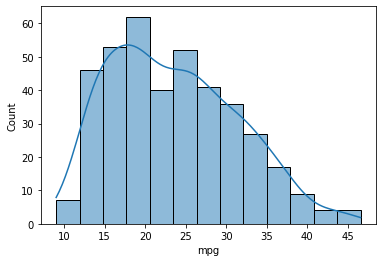

In [16]:
# distribution plot on mpg
sns.histplot(df['mpg'], kde = True)
plt.show();

In [17]:
print('skewness: %f' % df['mpg'].skew())

skewness: 0.457066


In [18]:
print('Kurtosis: %f' % df['mpg'].kurt())

Kurtosis: -0.510781


In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)

In [20]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [21]:
kmeans.fit(df[['mpg', 'horsepower']])

KMeans(n_clusters=3)

In [22]:
print(kmeans.cluster_centers_)

[[ 31.20373134  69.8358209 ]
 [ 14.48222222 164.44444444]
 [ 22.26494253  99.74137931]]


In [23]:
y = kmeans.labels_

In [24]:
y

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 0, 0, 2,
       0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2,

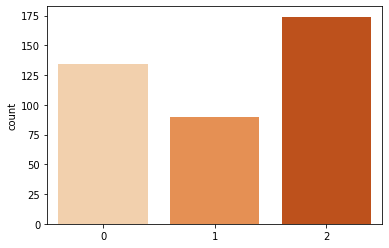

In [25]:
sns.countplot(x = y, palette='Oranges')
plt.show();

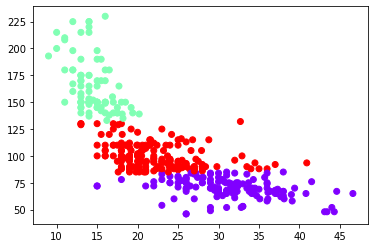

In [26]:
plt.scatter(df.iloc[:,0].values, df.iloc[:,3].values, c=y, cmap='rainbow')
plt.show();

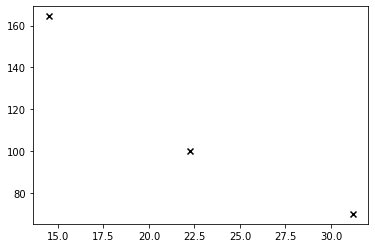

In [27]:
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker='x', color = 'k')
plt.show();

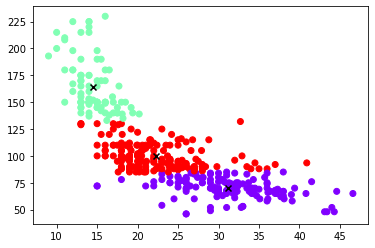

In [28]:
plt.scatter(df.iloc[:,0].values, df.iloc[:,3].values, c=y, cmap='rainbow')
plt.scatter(centers[:,0], centers[:,1], marker='x', color = 'k')
plt.show();

In [29]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

In [30]:
K = range(1,10)
X = df.drop(['cylinders','displacement','weight','acceleration','model year','origin','car name'],axis=1)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cldx = [np.argmin(D, axis = 1) for D in D_k]
dist = [np.min(D, axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

In [31]:
# total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2)/X.shape[0]
bss = tss-wcss
varExplained = bss/tss*100

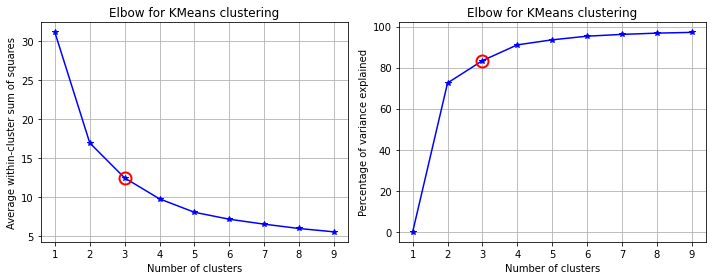

In [32]:
##### plot ###
kIdx = 2
# elbow curve
# Set the size of the plot
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(K, avgWithinSS, 'b*-')
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12,
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.subplot(1, 2, 2)
plt.plot(K, varExplained, 'b*-')
plt.plot(K[kIdx], varExplained[kIdx], marker='o', markersize=12,
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')
plt.tight_layout()

In [33]:
from sklearn.metrics import silhouette_score, silhouette_samples
silhouette_score(X, y)

0.525863077001247

In [34]:
from matplotlib import cm

In [35]:
score = []
for n_clusters in range(2,10):
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(X)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  score.append(silhouette_score(X, labels, metric = 'euclidean'))

Text(0.5, 1.0, 'Silouette for K-means')

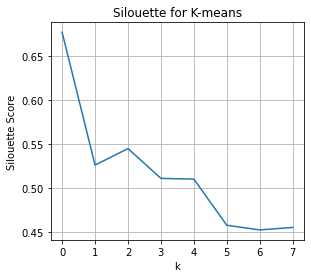

In [36]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(score)
plt.grid(True)
plt.ylabel("Silouette Score")
plt.xlabel("k")
plt.title("Silouette for K-means")